## Supervised linear regression

In [18]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

                  Open        High         Low       Close     Volume  \
Date                                                                    
2011-08-10  115.260002  116.279999  111.949997  112.290001  662607400   
2011-08-11  113.260002  118.919998  112.320000  117.330002  487979700   
2011-08-12  118.400002  119.209999  117.279999  118.120003  313731600   
2011-08-15  119.190002  120.739998  119.000000  120.620003  258810600   
2011-08-16  119.470001  120.690002  118.309998  119.589996  294095200   
2011-08-17  120.250000  121.199997  118.720001  119.669998  238201100   

             Adj Close  Adj_Close_5_Days_Later  
Date                                            
2011-08-10  101.247666              107.901932  
2011-08-11  105.792045              103.249358  
2011-08-12  106.504359              101.563247  
2011-08-15  108.758515              101.644400  
2011-08-16  107.829797              104.989566  
2011-08-17  107.901932              106.468292  
regr.score(X_train, y_t

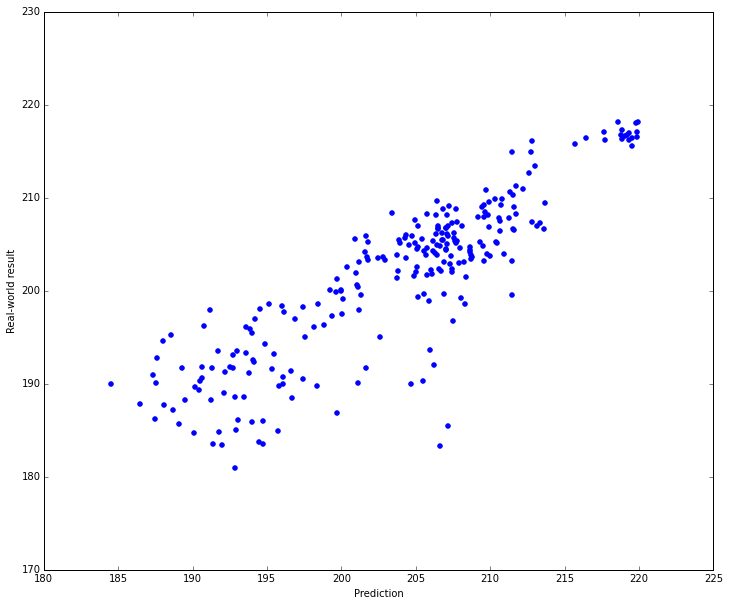

In [64]:
import os
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.cross_validation import train_test_split
from sklearn import linear_model


def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def plot_selected(df, columns, start_index, end_index):

    plot_data(df.ix[start_index:end_index,columns], title="Stock Data")
    
    
def plot_data(df, title):
    ax = df.plot(title=title,fontsize=12,figsize=(12,10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()


def show_supervised_linear_regression():
    
    df = pd.read_csv(symbol_to_path('SPY'), index_col='Date', 
                parse_dates=True, 
                usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], 
                na_values=['nan'])
    
    # sort data chronologically
    df = df.sort_index(ascending=True, axis=0)
    
    # add new column to view Adj Close 5 days later
    df['Adj_Close_5_Days_Later'] = df['Adj Close']
    df['Adj_Close_5_Days_Later'] = df['Adj_Close_5_Days_Later'].shift(-5)
    print df.head(6)
    
    # reduce data by date
    # df_smaller_set = df['20150101':'20160101'] # Not sure if this works yet
    
    # Slice and plot
    # plot_selected(df, ['Adj Close'], '2015-01-01', '2016-01-01')
    
    # Get the features and labels from the stock dataset
    # X = df.iloc[:,:-1]
    # y = df.iloc[:, -1]
    # Split the data into training/testing sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    ##### NOTE:  Can't use gridsearchCV.train_test_split because it doesn't do roll-forward cross validation. #####
    # print "\n", "df.shape: ", df.shape, "\n"
    X_train = df.iloc[0:1000,:-1]
    y_train = df.iloc[0:1000, -1]
    X_test = df.iloc[1000:1253,:-1]
    y_test = df.iloc[1000:1253, -1]
    
    # print "X_train: "
    # print X_train.head()
    # print "y_train: "
    # print y_train.head(), "\n"
    # print "X_test: "
    # print X_test.tail()
    # print "y_test: "
    # print y_test.tail(), "\n"
    
    
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    
    # Score
    print "regr.score(X_train, y_train): ", regr.score(X_train, y_train)
    print "\n"
    
    # Query
    regr.predict(X_test)
    
    # The coefficients
    print "Coefficients (formatted): "
    print ("Open: {0:.4f}".format(round(regr.coef_[0],4)))
    print ("High: {0:.4f}".format(round(regr.coef_[1],4)))
    print ("Low: {0:.4f}".format(round(regr.coef_[2],4)))
    print ("Close: {0:.4f}".format(round(regr.coef_[3],4)))
    print ("Volume: {0:.9f}".format(round(regr.coef_[4],9)))
    print ("Adj Close: {0:.9f}".format(round(regr.coef_[5],9)))
    print "\n"

    # The mean square error
    print("Residual sum of squares: %.2f"
          % np.mean((regr.predict(X_test) - y_test) ** 2))
    
    # Explained variance score: 1 is perfect prediction
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "\n"
    
    # Plot outputs
    plt.figure(figsize=(12,10))
    plt.xlabel("Prediction")
    plt.ylabel("Real-world result")
    plt.scatter(regr.predict(X_test), y_test, color='blue')
    # plt.plot(regr.predict(X_test), regr.predict(X_test), color='blue', linewidth=1)
    plt.show()
    
    # print "Prediction - regr.predict(X_test): "
    # print regr.predict(X_test)[0]
    # print regr.predict(X_test)[1]
    # print regr.predict(X_test)[2]
    # print regr.predict(X_test)[3]
    # print regr.predict(X_test)[4], "\n"
    # print "Actual (y_test): "
    # print y_test.head()

if __name__ == "__main__":
    show_supervised_linear_regression()